In [1]:
pip install requests beautifulsoup4 nltk matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import required libraries
import requests
from bs4 import BeautifulSoup
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import nltk

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\Abhinav
[nltk_data]     Work/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Abhinav
[nltk_data]     Work/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Define the URL
url = "https://en.wikipedia.org/wiki/Data_science"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Extract text from all paragraph tags
paragraphs = soup.find_all('p')
text = " ".join([para.get_text() for para in paragraphs])

# Display the first 500 characters of the scraped text
print(text[:500])



 Data science is an interdisciplinary academic field[1] that uses statistics, scientific computing, scientific methods, processing, scientific visualization, algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy, structured, or unstructured data.[2]
 Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).[3] Data science is multifaceted and can be described as a 


In [4]:
# Remove references like [1], [2], etc.
text_cleaned = re.sub(r'\[.*?\]', '', text)

# Remove special characters and numbers, keeping only alphabets and spaces
text_cleaned = re.sub(r'[^a-zA-Z\s]', '', text_cleaned)

# Convert to lowercase
text_cleaned = text_cleaned.lower()

# Display the cleaned text
print(text_cleaned[:500])



 data science is an interdisciplinary academic field that uses statistics scientific computing scientific methods processing scientific visualization algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy structured or unstructured data
 data science also integrates domain knowledge from the underlying application domain eg natural sciences information technology and medicine data science is multifaceted and can be described as a science a research paradi


In [5]:
import nltk
print(nltk.data.path)


['C:\\Users\\Abhinav Work/nltk_data', 'C:\\Users\\Abhinav Work\\anaconda3\\nltk_data', 'C:\\Users\\Abhinav Work\\anaconda3\\share\\nltk_data', 'C:\\Users\\Abhinav Work\\anaconda3\\lib\\nltk_data', 'C:\\Users\\Abhinav Work\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [6]:
# Use split as an alternative to word_tokenize
tokens = text_cleaned.split()

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Display the first 20 tokens
print(filtered_tokens[:20])


['data', 'science', 'interdisciplinary', 'academic', 'field', 'uses', 'statistics', 'scientific', 'computing', 'scientific', 'methods', 'processing', 'scientific', 'visualization', 'algorithms', 'systems', 'extract', 'extrapolate', 'knowledge', 'insights']


In [7]:
from collections import Counter
import matplotlib.pyplot as plt

# Count word frequencies
word_counts = Counter(filtered_tokens)

# Display the 10 most common words
top_words = word_counts.most_common(10)
print("Top 10 words:", top_words)


Top 10 words: [('data', 105), ('science', 50), ('statistics', 19), ('analysis', 18), ('field', 10), ('information', 10), ('statistical', 10), ('knowledge', 8), ('insights', 8), ('learning', 8)]


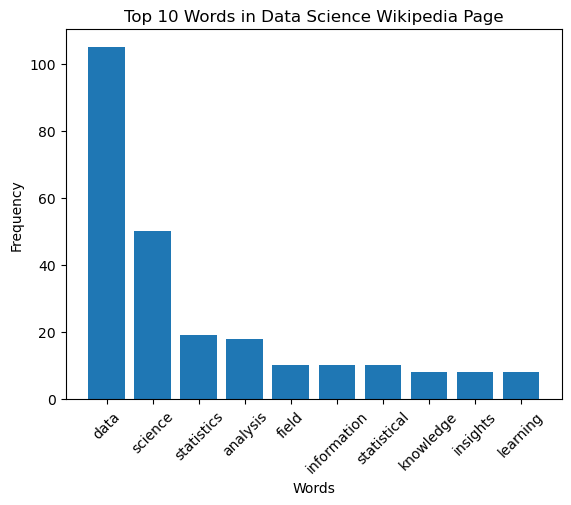

In [8]:
# Plot the top 10 most common words
words, counts = zip(*top_words)
plt.bar(words, counts)
plt.title("Top 10 Words in Data Science Wikipedia Page")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [9]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


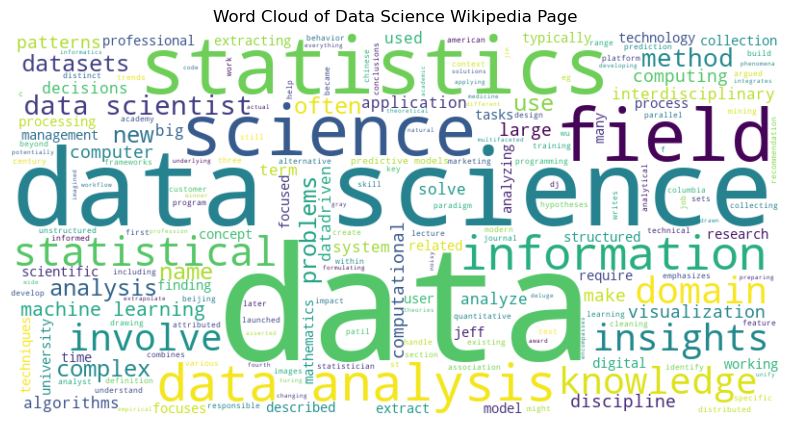

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(filtered_tokens))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Data Science Wikipedia Page")
plt.show()

In [24]:
from nltk.util import ngrams

# Generate bigrams
bigrams = list(ngrams(filtered_tokens, 2))

# Count the frequency of bigrams
bigram_counts = Counter(bigrams)

# Display the 10 most common bigrams
print("Top 10 bigrams:", bigram_counts.most_common(10))


Top 10 bigrams: [(('data', 'science'), 38), (('data', 'analysis'), 12), (('machine', 'learning'), 6), (('data', 'data'), 5), (('computer', 'science'), 5), (('data', 'scientist'), 4), (('insights', 'data'), 4), (('big', 'data'), 4), (('data', 'scientists'), 4), (('science', 'interdisciplinary'), 3)]


In [26]:
# Calculate lexical diversity
unique_words = set(filtered_tokens)
lexical_diversity = len(unique_words) / len(filtered_tokens)
print("Lexical diversity:", lexical_diversity)


Lexical diversity: 0.5014749262536873


In [30]:
pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 626.3/626.3 kB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [32]:
from textblob import TextBlob

# Perform sentiment analysis
blob = TextBlob(" ".join(filtered_tokens))
print("Polarity:", blob.sentiment.polarity)  # -1 to 1 (negative to positive sentiment)
print("Subjectivity:", blob.sentiment.subjectivity)  # 0 to 1 (objective to subjective)

Polarity: 0.0636701170117012
Subjectivity: 0.35924574600317166


In [42]:
# Define the URL
url_g = "https://www.geeksforgeeks.org/data-science-for-beginners/"

# Parse the content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find all span tags with text content
content = soup.find_all('span')

# Combine and print the text content
text = " ".join([span.get_text() for span in content])
print(text[:500])  # Display the first 500 characters

Courses DSA Courses Programming Languages Tutorials Python Tutorial Python Data Types Python Loops and Control Flow Python Data Structures Python Exercises Java Java Programming Language OOPs Concepts Java Collections Java Programs Java Interview Questions Java Quiz Advance Java Programming Languages System Design System Design Tutorial Interview Corner Computer Science Subjects DevOps Linux Software Testing Databases Android Excel Mathematics DSA Data Structures Linked List Tree Algorithms Anal


In [44]:
# Use split as an alternative to word_tokenize
tokens = text.split()

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Display the first 20 tokens
print(filtered_tokens[:20])


['Courses', 'DSA', 'Courses', 'Programming', 'Languages', 'Tutorials', 'Python', 'Tutorial', 'Python', 'Data', 'Types', 'Python', 'Loops', 'Control', 'Flow', 'Python', 'Data', 'Structures', 'Python', 'Exercises']


In [46]:
from collections import Counter
import matplotlib.pyplot as plt

# Count word frequencies
word_counts = Counter(filtered_tokens)

# Display the 10 most common words
top_words = word_counts.most_common(10)
print("Top 10 words:", top_words)


Top 10 words: [('Data', 74), ('data', 37), ('read', 31), ('min', 30), ('R', 25), ('Python', 23), ('Science', 17), ('science', 17), ('using', 17), ('Analysis', 13)]


In [48]:
from nltk.util import ngrams

# Generate bigrams
bigrams = list(ngrams(filtered_tokens, 2))

# Count the frequency of bigrams
bigram_counts = Counter(bigrams)

# Display the 10 most common bigrams
print("Top 10 bigrams:", bigram_counts.most_common(10))

Top 10 bigrams: [(('min', 'read'), 30), (('Data', 'Science'), 16), (('data', 'science'), 15), (('Data', 'Analysis'), 11), (('Data', 'Science.'), 6), (('read', '5'), 6), (('5', 'min'), 6), (('machine', 'learning'), 5), (('Exploratory', 'Data'), 5), (('Web', 'Scraping'), 5)]


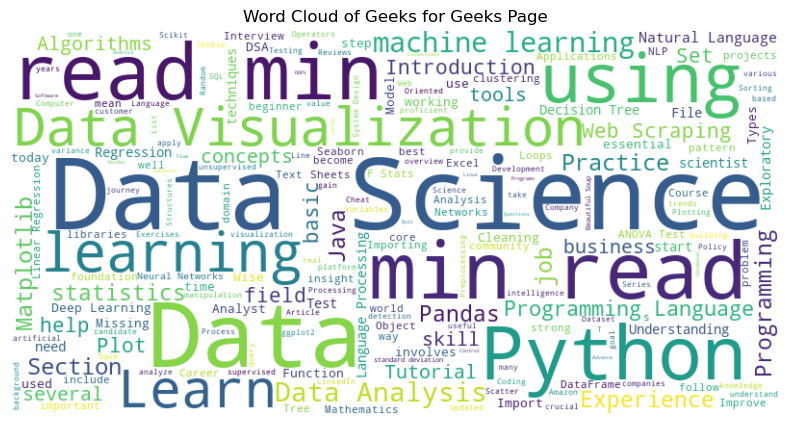

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(filtered_tokens))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Geeks for Geeks Page")
plt.show()

In [54]:
pip install docling

Note: you may need to restart the kernel to use updated packages.Collecting docling
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached python_docx-1.1.2-py3-none-any.whl.metadata (2.0 kB)
  Using cached python_pptx-1.0.2-py3-none-any.whl.metadata (2.5 kB)
  Using cached typer-0.12.5-py3-none-any.whl.metadata (15 kB)
  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
  Using cached jsonref-1.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached XlsxWriter-3.2.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ----------------------- ---------------- 4.7/7.9 MB 28.6 MB/s eta 0:00:01
   ---------------------------------------- 7.9/7.9 MB 23.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/23.2 MB ? eta -:--:--
   ------------- -----

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, but you have pyqt5 5.15.10 which is incompatible.
spyder 5.2.2 requires pyqtwebengine<5.13, but you have pyqtwebengine 5.15.6 which is incompatible.


In [70]:
from docling.document_converter import DocumentConverter

source = "data_science.pdf"  # document per local path or URL
converter = DocumentConverter()
result = converter.convert(source)
print(result.document.export_to_markdown())  # output: "## Docling Technical Report[...]"

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


*ERR* --- *ERR*
*ERR* Table is not square! *ERR*
*Padding to square...*
*ERR* --- *ERR*
*ERR* Table is not square! *ERR*
*Padding to square...*
## Generative AI

How ChatGPT and Other AI Tools Will Revolutionize Business

Tom Taulli

-

## GENERATIVE AI

HOW CHATGPT AND OTHER AI TOOLS WILL REVOLUTIONIZE BUSINESS

Tom Taulli

## Generative AI: How ChatGPT and Other AI Tools Will Revolutionize Business

Tom Taulli Monrovia, CA, USA

ISBN-13 (pbk): 978-1-4842-9369-0

ISBN-13 (electronic): 978-1-4842-9367-6

https://doi.org/10.1007/978-1-4842-9367-6

## Copyright © 2023 by Tom Taulli

This work is subject to copyright. All rights are reserved by the Publisher, whether the whole or part of the material is concerned, specifically the rights of translation, reprinting, reuse of illustrations, recitation, broadcasting, reproduction on microfilms or in any other physical way, and transmission or information storage and retrieval, electronic adaptation, computer software, or by similar or dissim

In [82]:
import pandas as pd

# Extract text content
text_data = result.document.export_to_markdown()

# Convert to DataFrame
df = pd.DataFrame({'text': [text_data]})

In [91]:
import string
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Define stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Tokenize text
df['tokens'] = df['text'].apply(word_tokenize)

# Convert to lowercase
df['tokens'] = df['tokens'].apply(lambda x: [word.lower() for word in x])

# Remove punctuation and stop words
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in punctuation and word not in stop_words])

# Join tokens back to string
df['processed_text'] = df['tokens'].apply(lambda x: ' '.join(x))


[nltk_data] Downloading package punkt to C:\Users\Abhinav
[nltk_data]     Work/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Abhinav
[nltk_data]     Work/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
# Define stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Filter tokens to remove non-alphanumeric words
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words])

# Join tokens back to string if needed
df['processed_text'] = df['tokens'].apply(lambda x: ' '.join(x))


In [97]:
# Flatten list of tokens
all_tokens = [token for sublist in df['tokens'] for token in sublist]

# Calculate word frequencies
word_freq = Counter(all_tokens)

# Convert to DataFrame for visualization
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

# Display top 10 words
print(word_freq_df.head(10))

           word  frequency
1            ai        816
181        data        442
0    generative        398
661       model        256
156        also        251
225        like        219
247       would        197
425      system        194
184  technology        193
187      models        189


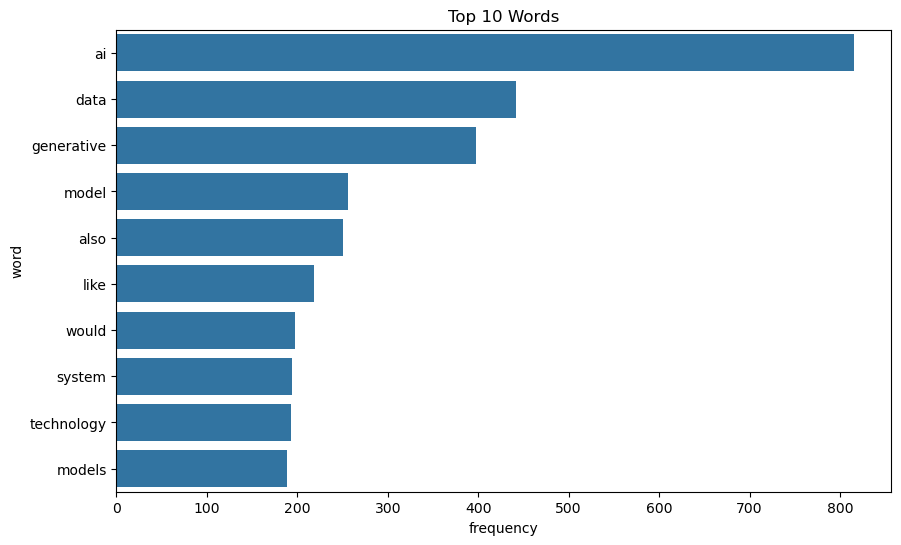

In [101]:
import seaborn as sns

# Plot top 10 words
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='word', data=word_freq_df.head(10))
plt.title('Top 10 Words')
plt.show()

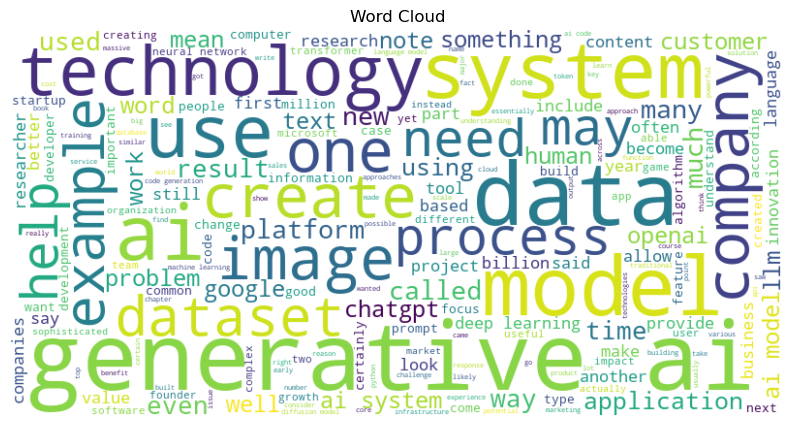

In [103]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))

# Display word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

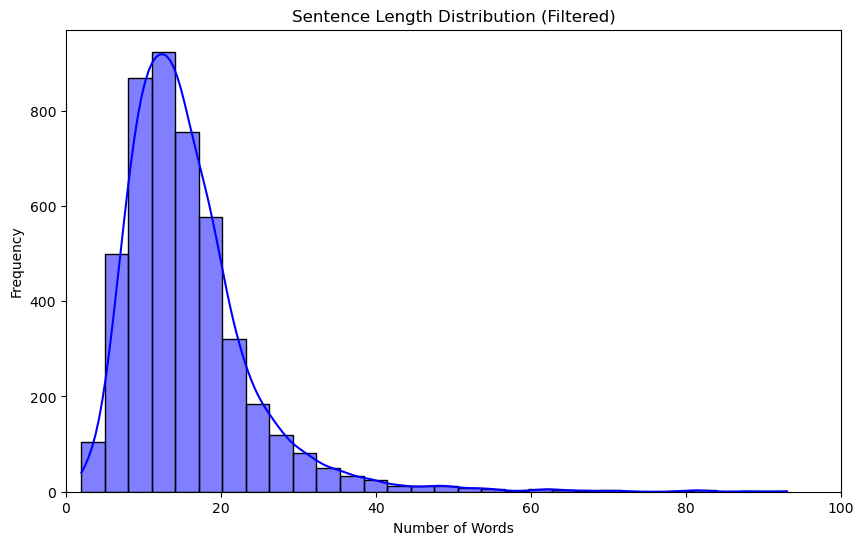

In [109]:
# Flatten list of sentence lengths
all_sentence_lengths = [length for sublist in df['sentence_lengths'] for length in sublist]

# Remove outliers (e.g., sentences longer than 100 words)
filtered_sentence_lengths = [length for length in all_sentence_lengths if length <= 100]

# Plot sentence length distribution
plt.figure(figsize=(10, 6))
sns.histplot(filtered_sentence_lengths, bins=30, kde=True, color='blue')
plt.title('Sentence Length Distribution (Filtered)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Focus on sentences with length up to 100 words
plt.show()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Abhinav Work/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


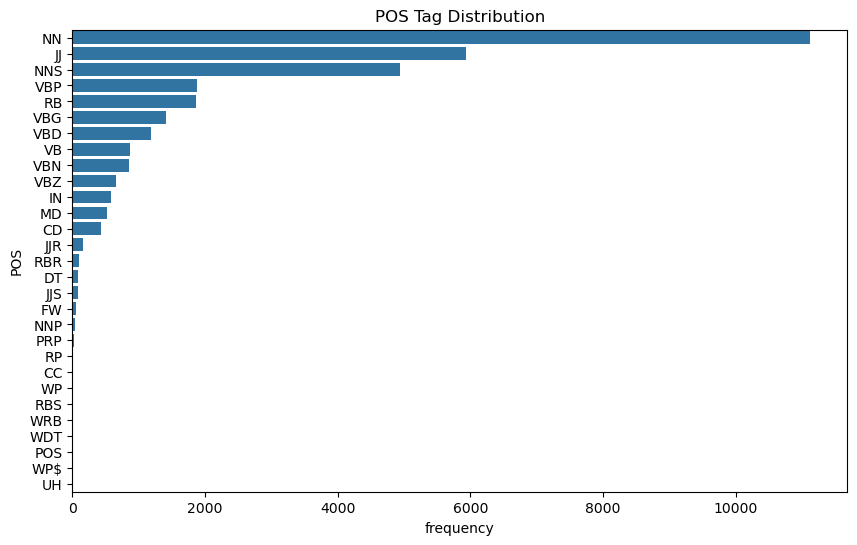

In [114]:
# Download NLTK POS tagger
nltk.download('averaged_perceptron_tagger')

# POS tagging
df['pos_tags'] = df['tokens'].apply(nltk.pos_tag)

# Extract POS tags
all_pos_tags = [tag for sublist in df['pos_tags'] for word, tag in sublist]

# Calculate POS tag frequencies
pos_freq = Counter(all_pos_tags)

# Convert to DataFrame for visualization
pos_freq_df = pd.DataFrame(pos_freq.items(), columns=['POS', 'frequency']).sort_values(by='frequency', ascending=False)

# Plot POS tag distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='POS', data=pos_freq_df)
plt.title('POS Tag Distribution')
plt.show()